<a href="https://colab.research.google.com/github/lunacandido/deep_learning_pytorch_luna_cursoalura/blob/main/convolu%C3%A7%C3%A3o1d_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolução 1D

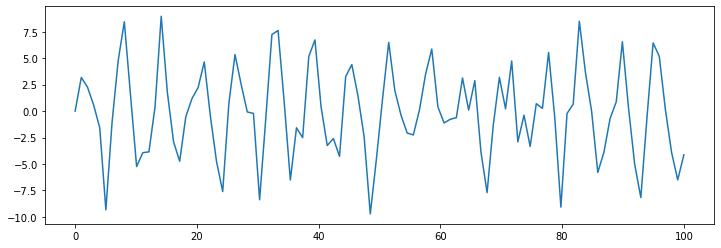

In [ ]:
# Convolução = produto entre duas funções que resulta em uma terceira
# Ou seja, é o somatório do produto entre funções, sendo uma delas invertida e deslocada
## Usaremos o intervalo 1D para detectar sinais crescentes em um sinal acelerômentro

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
# função senóide
x = np.linspace(0, 100, 100) ## intervalo entre 0 e 100, com 100 parâmetros
sin = 10 * np.sin(x) * np.random.rand(x.shape[0])
# 'np.random.rand(x.shape[0])' é uma espécie de ruído
plt.figure(figsize=(12, 4))
plt.plot(x, sin)



In [ ]:
# imprime a função em forma de imagem
def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])

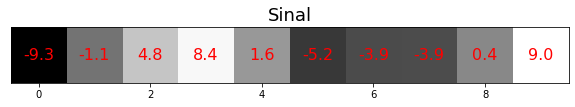

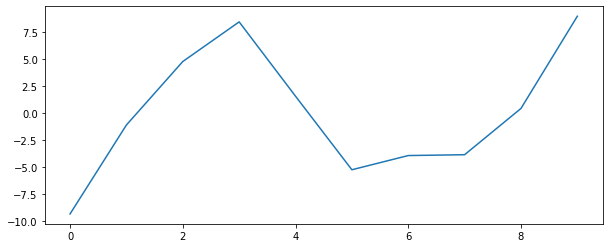

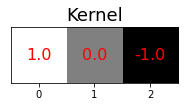

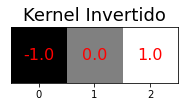

In [ ]:
# plotando o sinal
sinal = sin[5:15]
show(sinal, 'Sinal')
plt.figure(figsize=(10, 4))
plt.plot(sinal)
## criando filtro convolucional | esse filtro vai ser invertido para a convolução
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

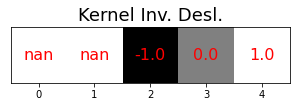

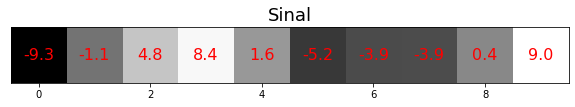

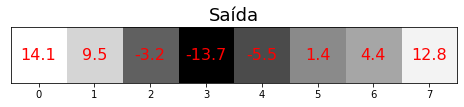

In [ ]:
## artifício de deslocamento do Kernel
u=2 # quantidade de casa deslocada
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

# deslocamento automatico
map_ativ = convolve(sinal, kernel, mode='valid')
show(map_ativ, 'Saída')

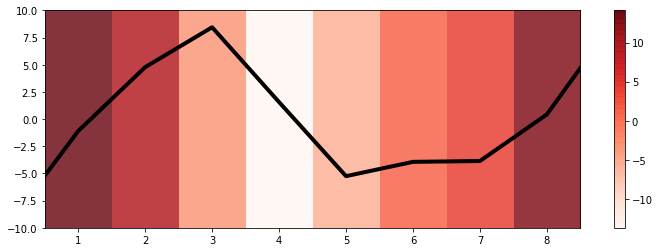

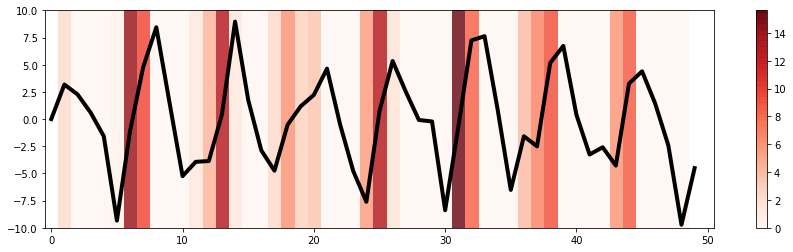

In [ ]:
# Como ficaria a fig com a sobreposição do sinal

plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(map_ativ[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar() # indicativo

## para a figura toda
map_ativ = convolve(sin[:50], kernel, mode='valid')
map_ativ[map_ativ < 0] = 0
## como o objetivo é saber a parte crescente, todos os sinais iguais a zero irá receber zero
# para ativar somente as ativações positivas
plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(map_ativ[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

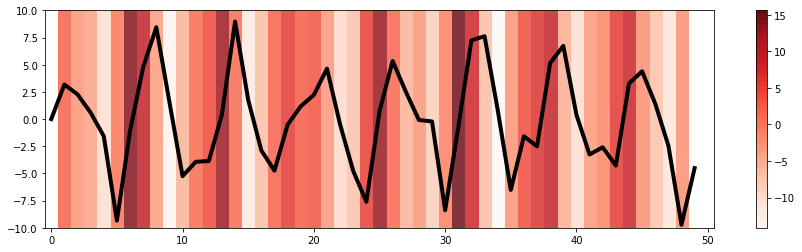

In [ ]:
## para a figura toda
map_ativ = convolve(sin[:50], kernel, mode='valid')
#map_ativ[map_ativ < 0] = 0
## sem retirar a ativação decrescente
plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(map_ativ[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

# Convolução 2D

In [ ]:
## Usar a covolução em 2 dimensões para extrair características de imagem
## kernel que se desloca em duas dimensões
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, transform, data
from scipy.signal import convolve

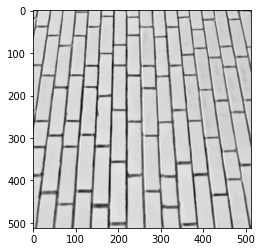

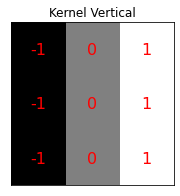

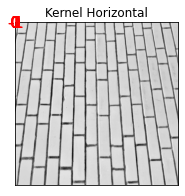

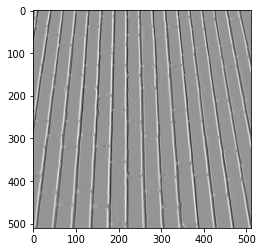

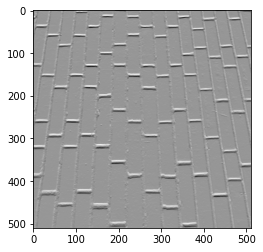

In [ ]:
# importando uma imagem de parede de tijolo
img = data.brick()
plt.imshow(img, cmap='Greys')

## imprimindo o kernel como imagem
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

# definindo os kernel vertical e horizontal | convolução 2d
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]
show(kernel_h, 'Kernel Horizontal')

## fazendo o mapa de ativação do kernel
mapa_atv = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_atv, cmap='Greys')

mapa_atv = convolve(img, kernel_h, mode='valid') ## modo valido é para pegar somente os pixels validos
plt.figure()
plt.imshow(mapa_atv, cmap='Greys')


     





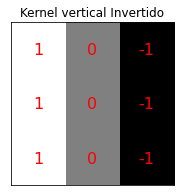

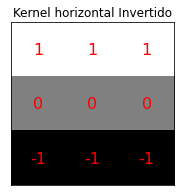

In [ ]:
## o kernel durante a convolução é utilizado invertido
show(np.flip(kernel_v), 'Kernel vertical Invertido')
show(np.flip(kernel_h), 'Kernel horizontal Invertido')

In [ ]:
 ## escolhi uma imagem do stitch no google e importei
 !wget https://imagensemoldes.com.br/wp-content/uploads/2020/03/Lilo-Stitch-PNG-09-1024x1024.png

--2022-12-15 12:30:36--  https://imagensemoldes.com.br/wp-content/uploads/2020/03/Lilo-Stitch-PNG-09-1024x1024.png
Resolving imagensemoldes.com.br (imagensemoldes.com.br)... 172.67.159.145, 104.21.57.57, 2606:4700:3037::6815:3939, ...
Connecting to imagensemoldes.com.br (imagensemoldes.com.br)|172.67.159.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘Lilo-Stitch-PNG-09-1024x1024.png.3’

Lilo-Stitch-PNG-09-     [ <=>                ] 121.51K  --.-KB/s    in 0.02s   

2022-12-15 12:30:36 (6.28 MB/s) - ‘Lilo-Stitch-PNG-09-1024x1024.png.3’ saved [124428]



<ipython-input-38-a6e174f744f5>:2: FutureWarning:

Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.



Text(0.5, 1.0, 'Mapa de ativação')

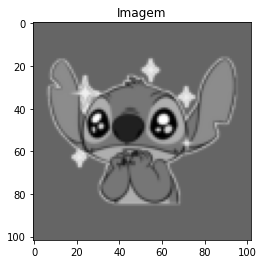

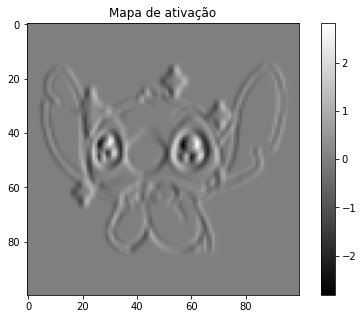

In [ ]:
img = io.imread('Lilo-Stitch-PNG-09-1024x1024.png.3')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

saida = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')

plt.figure(figsize=(8, 5))
plt.imshow(saida, cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação')

<ipython-input-39-74093f6332dc>:2: FutureWarning:

Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.



Text(0.5, 1.0, 'Mapa de ativação')

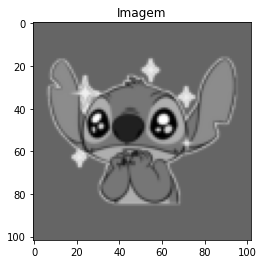

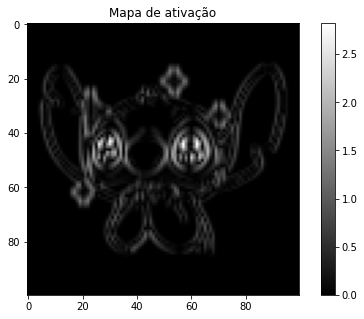

In [ ]:
# com o absoluto só se considera onde o ponto de ativação foi forte
# independentemente do claro e escuro
img = io.imread('Lilo-Stitch-PNG-09-1024x1024.png.3')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

saida = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação')


## Filtros Convolucionais

In [4]:
# kernels são filtros/arrays que carregam padrão que procuramos nas imagens originais
# fazendo os imports necessários
import matplotlib.pyplot as plt
from skimage import io
from scipy.signal import convolve
import numpy as np
# saída dos comandos é exibido em linha
%matplotlib inline 


In [ ]:
## importando uma imagem do google
!wget https://www.hypeness.com.br/1/2019/04/A_Einstein_1.png

--2022-12-16 11:12:40--  https://www.hypeness.com.br/1/2019/04/A_Einstein_1.png
Resolving www.hypeness.com.br (www.hypeness.com.br)... 104.18.6.198, 104.18.7.198, 2606:4700::6812:7c6, ...
Connecting to www.hypeness.com.br (www.hypeness.com.br)|104.18.6.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264875 (259K) [image/png]
Saving to: ‘A_Einstein_1.png’

A_Einstein_1.png    100%[===================>] 258.67K  --.-KB/s    in 0.02s   

2022-12-16 11:12:41 (12.2 MB/s) - ‘A_Einstein_1.png’ saved [264875/264875]



In [ ]:
## organizando a saída dos resultados
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

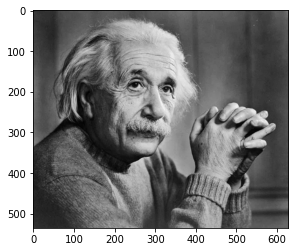

In [ ]:
img = io.imread('A_Einstein_1.png')
img = img[:,:,0]
plt.imshow(img, cmap='gray')

##  Filtro da média

Mapa de ativação deste filtro será uma imagem suavizada e mais 'borrada', pois a convolução neste caso utiliza a operação de tirar a média dos pixels das subregiões da imagem.

∑ (1/n^2) * p(x) , para qualquer imagem n x n

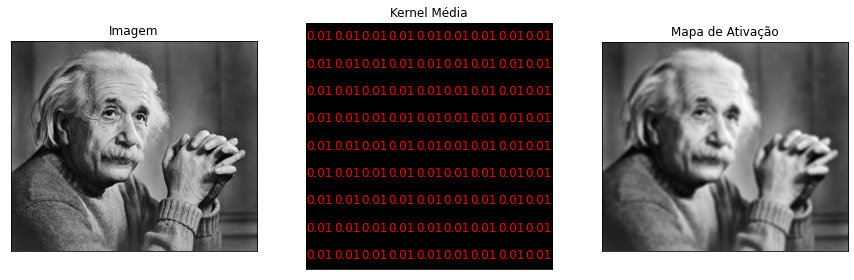

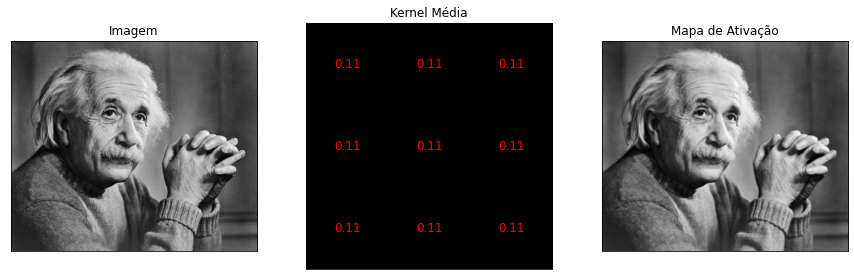

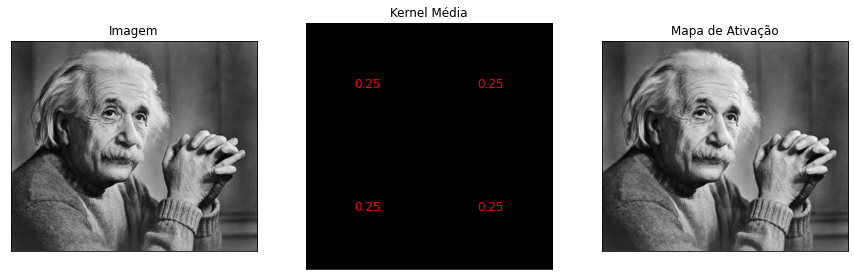

In [ ]:
## 9x9
kernel_media = np.zeros((9,9))
kernel_media[:] = 1.0/(9**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')
## 3x3
kernel_media = np.zeros((3,3))
kernel_media[:] = 1.0/(3**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

## 2x2
kernel_media = np.zeros((2,2))
kernel_media[:] = 1.0/(2**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

## Filtro de Sobel

Se assemelha em partes ao filtro de bordas, porém os pixels centrais possuem valor maior a fim de independentemente da borda desejada, inclua um pouco a outra borda.

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


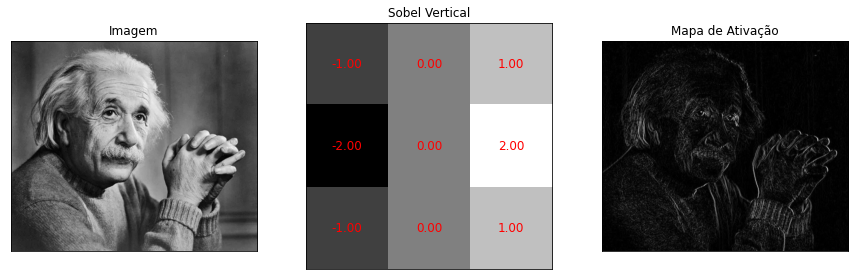

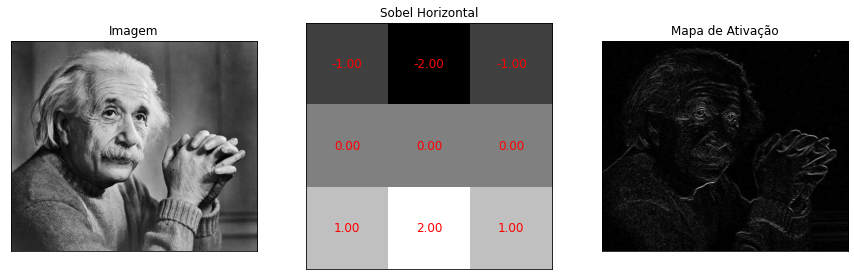

In [ ]:
# Os kernels abaixo são feito por meio de arrays
## bordas verticais
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2] ## região central recebe valores maiores
## assim neste caso captamos um pouco das bordas horizontais também
print(sobel_v)

resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, np.abs(resultado), 'Sobel Vertical')

## bordas horizontais
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2] # já aqui captamos bordas verticais também
print(sobel_h)

resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')

## Laplace

Um filtro que trabalha com todas as bordas igualmente, porém como não há privilégios, acaba se tornando bordas menos marcadas como às bordas verificadas no caso do filtro sobel.


[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


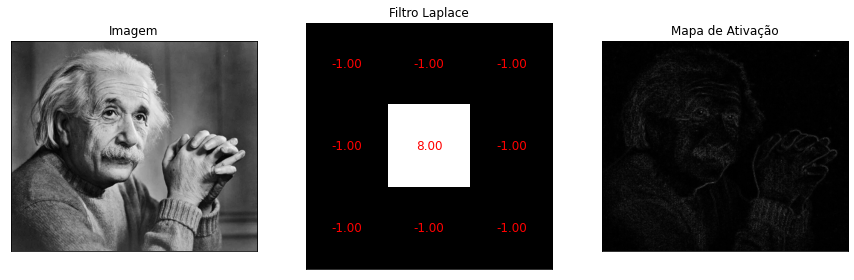

In [ ]:
## inicializando filtro Laplace

laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)

## colocando em prática meu filtro laplace
resultado = convolve(img, laplace, mode='valid')
show(img, laplace, np.abs(resultado), 'Filtro Laplace')


### Convolução e padrões complexos

Filtro convolucional mais completo.

In [1]:
!wget https://img.wallpapic-br.com/i8833-649-823/medium/disney-desenho-animado-desenhos-animados-animacao-imagem-de-fundo.jpg

--2022-12-17 10:30:23--  https://img.wallpapic-br.com/i8833-649-823/medium/disney-desenho-animado-desenhos-animados-animacao-imagem-de-fundo.jpg
Resolving img.wallpapic-br.com (img.wallpapic-br.com)... 172.67.148.109, 104.21.87.236, 2606:4700:3032::6815:57ec, ...
Connecting to img.wallpapic-br.com (img.wallpapic-br.com)|172.67.148.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217735 (213K) [image/jpeg]
Saving to: ‘disney-desenho-animado-desenhos-animados-animacao-imagem-de-fundo.jpg’

disney-desenho-anim 100%[===================>] 212.63K   727KB/s    in 0.3s    

2022-12-17 10:30:24 (727 KB/s) - ‘disney-desenho-animado-desenhos-animados-animacao-imagem-de-fundo.jpg’ saved [217735/217735]



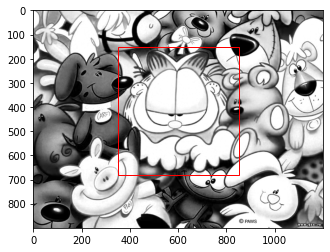

In [19]:
import matplotlib.patches as patches

# Imprime imagem e seleciona retangulo
img = io.imread('disney-desenho-animado-desenhos-animados-animacao-imagem-de-fundo.jpg')
img = img[:,:,0]
retangulo = [150, 680, 350, 850]


## Imprime imagem e o retangulo do objeto desejado
# no caso é o garfield
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

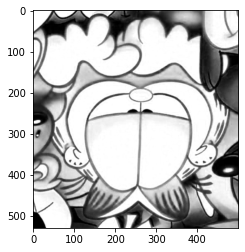

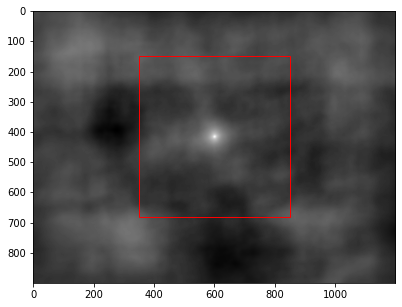

In [25]:
%matplotlib inline
#Para que o patch possa ser utilizado como filtro de convolução:

patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]
# 1° Subtrair o patch pelo valor do pixel médio (centralizando a distribuição)
patch = patch - patch.mean()
# 2° Inverter o filtro com a função flip do numpy.
patch = np.flip(patch)

plt.imshow(patch, cmap='gray')

# observando o resultado da convolução
#onde o mapa de ativação foi mais forte
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))